In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os  
from glob import glob
import sys 
import pygsp
from importlib import reload
from pathlib import Path

sys.path.append("/home/localadmin/Bureau/HUGO/repositories/gsp_neuro/gsp_neuro")
import data_loading as dload
reload(dload)
import plotting as plot
import consensus_connectome as cconn
reload(cconn)

/home/localadmin/Installs/miniconda3/envs/hugo/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data_base_dir = "/home/localadmin/Bureau/HUGO/data/BIOPSYCHO_CTRLS/"
subject_ids_lut = "/home/localadmin/Bureau/HUGO/Ids.csv"
subject_ids = [sub.get('subjID') for sub in dload.get_ids_csv(subject_ids_lut)]
subject_folders = [subfolder for subfolder in glob(data_base_dir + "sub-*") if subfolder[-8:] in subject_ids]

----- Working on scale 3 -----
      Coordinates loaded
      66 connectomes found
      Connectomes loaded
      Done! 



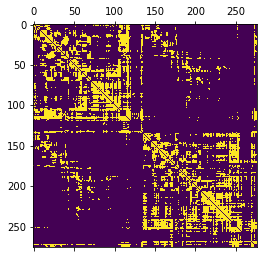

In [3]:
for scale in [3]:#, 2, 3, 4, 5] : 
    print("----- Working on scale {} -----".format(scale))

    df_coords = dload.read_coords(scale=scale)
    coords = df_coords[['XCoord(mm)','YCoord(mm)','ZCoord(mm)']].to_numpy()
    distances = cconn.distance_matrix(coords)
    print('      Coordinates loaded')

    connectomes_paths = dload.get_sub_connectomes_paths(subject_folders, scale = scale)
    Nsub = len(connectomes_paths)
    print('      {} connectomes found'.format(Nsub))

    conn = dload.load_connectome(connectomes_paths[0])
    connectomes = np.zeros((conn.shape + (Nsub,)))
    for i,conn_path in enumerate(connectomes_paths[1:]):
        conn = dload.load_connectome(conn_path, field='fibDensity')
        connectomes[...,i+1] = conn
    print('      Connectomes loaded')

    G, Gc = cconn.fcn_group_bins(connectomes, distances, nbins=100)
    print('      Done! \n')

In [ ]:
plt.matshow(connectomes.sum(axis=-1))

In [ ]:
G = pygsp.graphs.Graph(G,lap_type='normalized')
G.set_coordinates(kind=df_coords[['XCoord(mm)','YCoord(mm)','ZCoord(mm)']].to_numpy())

In [ ]:
G.compute_fourier_basis()

In [ ]:
G.plot(G.U[:,6], edges=False)